<center>
<h4>Diplomatura Datos 2021 - FaMAF - UNC</h4>
<h1>Aplicando Machine Learning para predicción de demanda</h1>
<h3>Aprendizaje No Supervisado</h3>
</center>
</left>
<h4>Dario Yvanoff</h4>
</left>

[Proyecto para Mentoría](https://sites.google.com/view/mentorias2021-diplodatos/aplicando-machine-learning-para-predicci%C3%B3n-de-demanda?authuser=0)

# Información Importante

En la presente notebook, se presentará la consigna a seguir para el cuarto y último práctico correspondiente a las materia Aprendizaje No Supervisado. En esta notebook se enumeran las consignas que permitirán implementar los pasos necesarios en la aplicación de métodos de aprendizaje no supervisado para encontrar patrones sistematizables. El objetivo final de este práctico es agrupar los datos para que podamos ver los productos que son comprados juntos por los clientes y de esa manera poder ofrecerles en conjunto al cliente.

Como este es el practico final se solicita que tanto este práctico como todos los anteriores de la presente mentoria sean presentados en un unico repositorio git.

Para este práctico, al igual que en los anteriores, el repositorio debe presentar:
- una notebook respondiendo las consignas de este práctico
- un informe (formato html, ppt o pdf) con las respuestas de este práctico. Dicho informe servirá de base para obtener la información a presentar en el video final de la mentoria. 

Se recomienda que el informe tenga las siguientes secciones:
- Introducción 
- Respuestas a los puntos del práctico
- Principales conclusiones




# Entregable 
Fecha de Entrega de este practico y el informe: 02/10/2021

# Introducción

En este práctico vamos a concentrarnos principalmente en los métodos que nos permitan identificar grupos de productos que se requiren o venden en forma conjunta de manera de que seamos capaces de agrupar comportamientos de clientes y de esa manera se puedan realizar recomendaciones de productos para cross selling o incluso conformar combos de productos que aumenten las ventas.

Incluso, al poder responder a la pregunta: ¿Qué productos se venderían juntos? Identificamos clusters de productos que pueden distribuirse conjuntamente antes que efectivamente se compren.

# Importacion de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Consignas

### 1- Preparar el dataset

Para las 6 categorias de productos mas vendidos y las 3 provincias que mas venden generar un dataset que contenga las siguientes características: 
- provincia
- localidad
- cantidad x categoria: cantidad total pedida en la categoria  

In [2]:
file_name='./dataset.csv'
dataset = pd.read_csv(file_name)
dataset.head()

dia  mes  anio              hora   sku  cantidad_pedida id_punto_venta  \
0    2    1  2018  15:03:30.0000000   266              1.0         100001   
1    2    1  2018  15:03:30.0000000   263              6.0         100001   
2    2    1  2018  15:03:30.0000000   861              1.0         100001   
3    2    1  2018  15:03:30.0000000  1103              3.0         100001   
4    2    1  2018  15:03:30.0000000  1695              3.0         100001   

        fecha          descripcion  marca  ...  id_proveedor  \
0  2018-01-02  FRUTXX-XX-X-XXXRIDO  GRIDO  ...           2.0   
1  2018-01-02  LIMOXX-XX-X-XXXRIDO  GRIDO  ...           2.0   
2  2018-01-02  MARAXX-XX-X-XXXRIDO  GRIDO  ...           2.0   
3  2018-01-02  NARAXX-XX-X-XXXRIDO  GRIDO  ...           2.0   
4  2018-01-02  BANAXX-XX-X-XXXRIDO  GRIDO  ...           2.0   

              categoria      Punto_Venta  id_Provincia  id_Localidad id_Pais  \
0  06 - SABORES AL AGUA  MONXXX-XX-XXSTO           5.0        1890.0     1.0   
1  06 - SABORES AL AGUA  MONXXX-XX-XXSTO           5.0        1890.0     1.0   
2  06 - SABORES AL AGUA  MONXXX-XX-XXSTO           5.0        1890.0     1.0   
3  06 - SABORES AL AGUA  MONXXX-XX-XXSTO           5.0        1890.0     1.0   
4  07 - SABORES COMUNES  MONXXX-XX-XXSTO           5.0        1890.0     1.0   

     Localidad  Provincia       Pais  totalkg  
0  Montecristo    Córdoba  Argentina      7.8  
1  Montecristo    Córdoba  Argentina     46.8  
2  Montecristo    Córdoba  Argentina      7.8  
3  Montecristo    Córdoba  Argentina     23.4  
4  Montecristo    Córdoba  Argentina     23.4  

[5 rows x 24 columns]

In [3]:
# Identificamos las primeras 6 categorías con la mayor cantidad de kilos vendidos.

In [4]:
top_categorias = dataset[['categoria','totalkg']].groupby(by=['categoria'])['totalkg'].sum().sort_values(ascending=False).nlargest(6).reset_index().round()
top_categorias

categoria     totalkg
0                  07 - SABORES COMUNES  14221639.0
1               08 - SABORES ESPECIALES   8924152.0
2                       17 - POTE 1 LTS   7822207.0
3                  09 - SABORES PREMIUM   5523375.0
4  10 - PALITOS CREMA / FRUTAL / BOMBON   4970367.0
5                         16 - FAMILIAR   4394150.0

In [5]:
# Identificamos las primeras 3 provincias con la mayor cantidad de kilos vendidos.

In [6]:
top_provincias = dataset[['Provincia','totalkg']].groupby(by=['Provincia'])['totalkg'].sum().sort_values(ascending=False).nlargest(3).reset_index().round()
top_provincias

Provincia     totalkg
0  Buenos Aires  22999801.0
1       Córdoba  14638995.0
2      Santa Fe   7316628.0

In [7]:
top_categorias_6 = ['07 - SABORES COMUNES','08 - SABORES ESPECIALES','17 - POTE 1 LTS',
                    '09 - SABORES PREMIUM','10 - PALITOS CREMA / FRUTAL / BOMBON','16 - FAMILIAR']
top_provincias_3= ['Buenos Aires', 'Córdoba', 'Santa Fe']

In [8]:
df = dataset[['Provincia','Localidad','categoria','cantidad_pedida']]
df.head()

Provincia    Localidad             categoria  cantidad_pedida
0   Córdoba  Montecristo  06 - SABORES AL AGUA              1.0
1   Córdoba  Montecristo  06 - SABORES AL AGUA              6.0
2   Córdoba  Montecristo  06 - SABORES AL AGUA              1.0
3   Córdoba  Montecristo  06 - SABORES AL AGUA              3.0
4   Córdoba  Montecristo  07 - SABORES COMUNES              3.0

In [9]:
df = df[df.categoria.isin(top_categorias_6)]
df = df[df.Provincia.isin(top_provincias_3)]
df.shape

(1881323, 4)

In [10]:
df = df.groupby(['Provincia','Localidad','categoria']).sum().reset_index()
df

Provincia               Localidad  \
0     Buenos Aires  25 De Mayo, 25 De Mayo   
1     Buenos Aires  25 De Mayo, 25 De Mayo   
2     Buenos Aires  25 De Mayo, 25 De Mayo   
3     Buenos Aires  25 De Mayo, 25 De Mayo   
4     Buenos Aires  25 De Mayo, 25 De Mayo   
...            ...                     ...   
2320      Santa Fe                 Zavalla   
2321      Santa Fe                 Zavalla   
2322      Santa Fe                 Zavalla   
2323      Santa Fe                 Zavalla   
2324      Santa Fe                 Zavalla   

                                 categoria  cantidad_pedida  
0                     07 - SABORES COMUNES           2239.0  
1                  08 - SABORES ESPECIALES           1000.0  
2                     09 - SABORES PREMIUM            693.0  
3     10 - PALITOS CREMA / FRUTAL / BOMBON           1715.0  
4                            16 - FAMILIAR            768.0  
...                                    ...              ...  
2320               08 - SABORES ESPECIALES             24.0  
2321                  09 - SABORES PREMIUM              8.0  
2322  10 - PALITOS CREMA / FRUTAL / BOMBON             12.0  
2323                         16 - FAMILIAR             13.0  
2324                       17 - POTE 1 LTS             21.0  

[2325 rows x 4 columns]

In [11]:
df_pivot = df.pivot(index=['Provincia', 'Localidad'],columns='categoria', values='cantidad_pedida')
df_pivot

categoria                                        07 - SABORES COMUNES  \
Provincia    Localidad                                                  
Buenos Aires 25 De Mayo, 25 De Mayo                            2239.0   
             3 De Febrero, 3 De Febrero                        2229.0   
             3 De Febrero, Caseros                             5217.0   
             3 De Febrero, Ciudadela                           1249.0   
             3 De Febrero, Remedios De Escalada                1787.0   
...                                                               ...   
Santa Fe     Villa Constitucion                                1881.0   
             Villa Gobernador Galvez                           5398.0   
             Villa Ocampo                                      1915.0   
             Wheelwright                                        848.0   
             Zavalla                                             52.0   

categoria                                        08 - SABORES ESPECIALES  \
Provincia    Localidad                                                     
Buenos Aires 25 De Mayo, 25 De Mayo                               1000.0   
             3 De Febrero, 3 De Febrero                           1045.0   
             3 De Febrero, Caseros                                2561.0   
             3 De Febrero, Ciudadela                               757.0   
             3 De Febrero, Remedios De Escalada                    989.0   
...                                                                  ...   
Santa Fe     Villa Constitucion                                   1287.0   
             Villa Gobernador Galvez                              2872.0   
             Villa Ocampo                                          947.0   
             Wheelwright                                           378.0   
             Zavalla                                                24.0   

categoria                                        09 - SABORES PREMIUM  \
Provincia    Localidad                                                  
Buenos Aires 25 De Mayo, 25 De Mayo                             693.0   
             3 De Febrero, 3 De Febrero                         627.0   
             3 De Febrero, Caseros                             1898.0   
             3 De Febrero, Ciudadela                            561.0   
             3 De Febrero, Remedios De Escalada                 646.0   
...                                                               ...   
Santa Fe     Villa Constitucion                                1005.0   
             Villa Gobernador Galvez                           2026.0   
             Villa Ocampo                                       391.0   
             Wheelwright                                        234.0   
             Zavalla                                              8.0   

categoria                                        10 - PALITOS CREMA / FRUTAL / BOMBON  \
Provincia    Localidad                                                                  
Buenos Aires 25 De Mayo, 25 De Mayo                                            1715.0   
             3 De Febrero, 3 De Febrero                                        1505.0   
             3 De Febrero, Caseros                                             3119.0   
             3 De Febrero, Ciudadela                                           1254.0   
             3 De Febrero, Remedios De Escalada                                1291.0   
...                                                                               ...   
Santa Fe     Villa Constitucion                                                1400.0   
             Villa Gobernador Galvez                                           3896.0   
             Villa Ocampo                                                      1109.0   
             Wheelwright                                                        400.0   
             Zavalla                       

In [12]:
df_pivot = df_pivot.reset_index().rename_axis('',axis=1)
df_pivot

Provincia                           Localidad  07 - SABORES COMUNES  \
0    Buenos Aires              25 De Mayo, 25 De Mayo                2239.0   
1    Buenos Aires          3 De Febrero, 3 De Febrero                2229.0   
2    Buenos Aires               3 De Febrero, Caseros                5217.0   
3    Buenos Aires             3 De Febrero, Ciudadela                1249.0   
4    Buenos Aires  3 De Febrero, Remedios De Escalada                1787.0   
..            ...                                 ...                   ...   
385      Santa Fe                  Villa Constitucion                1881.0   
386      Santa Fe             Villa Gobernador Galvez                5398.0   
387      Santa Fe                        Villa Ocampo                1915.0   
388      Santa Fe                         Wheelwright                 848.0   
389      Santa Fe                             Zavalla                  52.0   

     08 - SABORES ESPECIALES  09 - SABORES PREMIUM  \
0                     1000.0                 693.0   
1                     1045.0                 627.0   
2                     2561.0                1898.0   
3                      757.0                 561.0   
4                      989.0                 646.0   
..                       ...                   ...   
385                   1287.0                1005.0   
386                   2872.0                2026.0   
387                    947.0                 391.0   
388                    378.0                 234.0   
389                     24.0                   8.0   

     10 - PALITOS CREMA / FRUTAL / BOMBON  16 - FAMILIAR  17 - POTE 1 LTS  
0                                  1715.0          768.0           2146.0  
1                                  1505.0          524.0           1272.0  
2                                  3119.0         1395.0           1570.0  
3                                  1254.0          318.0           1264.0  
4                                  1291.0          422.0           1695.0  
..                                    ...            ...              ...  
385                                1400.0          572.0           2949.0  
386                                3896.0         1218.0           7496.0  
387                                1109.0          104.0           3028.0  
388                                 400.0          418.0            345.0  
389                                  12.0           13.0             21.0  

[390 rows x 8 columns]

In [13]:
df_pivot.dropna(inplace=True)

In [14]:
df_pivot.shape

(384, 8)

### 2- Separar Datos de muestra del dataset

Como este es un problema de aprendizaje no supervisado, no contamos con datos de compración de los resultaods por lo que vamos a separar algunos datos de muestras al azar de nuestro dataset para ver luego si corresponden a algún clúster encontrado y poder obtener conclusiones.

Para esto, elegir 10 filas del dataset al azar (utilizar la instrucción loc), almacenarlas en un nuevo dataframe llamado "muestras" y eliminar dichas filas del dataset de entrada (utilizar la instrucción drop). Este dataframe denominado "muestras" lo utilizaremos luego el análisis final 

Ejemplo de código :

indices = [1,11,22,33,44,55,66,77,88,99]  

muestras = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)

df = df.drop(indices, axis = 0)

In [15]:
# df_sample = df_pivot.sample(10)
# df_sample

In [16]:
# indices = df_sample.index.to_list()
# indices

In [17]:
indices = [272, 345, 56, 381, 300, 231, 77, 198, 142, 244]

In [18]:
muestras = pd.DataFrame(df_pivot.loc[indices])
muestras

Provincia                                       Localidad  \
272       Córdoba                                       La Puerta   
345      Santa Fe                                       El Trebol   
56   Buenos Aires                  Coronel Suarez, Coronel Suarez   
381      Santa Fe                                         Totoras   
300       Córdoba                                     Río Tercero   
231       Córdoba                                     Agua De Oro   
77   Buenos Aires  General Juan Madariaga, General Juan Madariaga   
198  Buenos Aires                          San Miguel, San Miguel   
142  Buenos Aires             Malvinas Argentinas, Los Polvorines   
244       Córdoba                                          Canals   

     07 - SABORES COMUNES  08 - SABORES ESPECIALES  09 - SABORES PREMIUM  \
272                1162.0                    542.0                 244.0   
345                1316.0                    668.0                 404.0   
56                 4373.0                   2870.0                1642.0   
381                2332.0                    916.0                 611.0   
300                 128.0                    264.0                 199.0   
231                 888.0                    499.0                 352.0   
77                 2311.0                   1072.0                 636.0   
198                2358.0                   1768.0                1177.0   
142                1200.0                   1320.0                 886.0   
244                1815.0                    930.0                 538.0   

     10 - PALITOS CREMA / FRUTAL / BOMBON  16 - FAMILIAR  17 - POTE 1 LTS  
272                                 513.0          276.0            458.0  
345                                 552.0          531.0           1417.0  
56                                 2648.0         1067.0          10507.0  
381                                1288.0          609.0           2361.0  
300                                 447.0           36.0           1281.0  
231                                 661.0          286.0            562.0  
77                                  851.0          419.0            898.0  
198                                1496.0          484.0           2804.0  
142                                1411.0          342.0           2481.0  
244                                 671.0          536.0            852.0

In [19]:
df_pivot = df_pivot.drop(indices, axis = 0)
df_pivot.shape

(374, 8)

### 3- Eliminar las columnas no relevantes

Eliminar del dataset generado en el punto 1 las columnas provincia y localidad. Estas columnas fueron relevantes para la generación de la información de cantidades pedidas por las categorias principales pero no son requeridas a la hora de identificar los clusters.

In [20]:
df_pivot.head()

Provincia                           Localidad  07 - SABORES COMUNES  \
0  Buenos Aires              25 De Mayo, 25 De Mayo                2239.0   
1  Buenos Aires          3 De Febrero, 3 De Febrero                2229.0   
2  Buenos Aires               3 De Febrero, Caseros                5217.0   
3  Buenos Aires             3 De Febrero, Ciudadela                1249.0   
4  Buenos Aires  3 De Febrero, Remedios De Escalada                1787.0   

   08 - SABORES ESPECIALES  09 - SABORES PREMIUM  \
0                   1000.0                 693.0   
1                   1045.0                 627.0   
2                   2561.0                1898.0   
3                    757.0                 561.0   
4                    989.0                 646.0   

   10 - PALITOS CREMA / FRUTAL / BOMBON  16 - FAMILIAR  17 - POTE 1 LTS  
0                                1715.0          768.0           2146.0  
1                                1505.0          524.0           1272.0  
2                                3119.0         1395.0           1570.0  
3                                1254.0          318.0           1264.0  
4                                1291.0          422.0           1695.0

In [21]:
df_pivot.drop(['Provincia','Localidad'], axis=1, inplace=True)

In [22]:
df_pivot

07 - SABORES COMUNES  08 - SABORES ESPECIALES  09 - SABORES PREMIUM  \
0                  2239.0                   1000.0                 693.0   
1                  2229.0                   1045.0                 627.0   
2                  5217.0                   2561.0                1898.0   
3                  1249.0                    757.0                 561.0   
4                  1787.0                    989.0                 646.0   
..                    ...                      ...                   ...   
385                1881.0                   1287.0                1005.0   
386                5398.0                   2872.0                2026.0   
387                1915.0                    947.0                 391.0   
388                 848.0                    378.0                 234.0   
389                  52.0                     24.0                   8.0   

     10 - PALITOS CREMA / FRUTAL / BOMBON  16 - FAMILIAR  17 - POTE 1 LTS  
0                                  1715.0          768.0           2146.0  
1                                  1505.0          524.0           1272.0  
2                                  3119.0         1395.0           1570.0  
3                                  1254.0          318.0           1264.0  
4                                  1291.0          422.0           1695.0  
..                                    ...            ...              ...  
385                                1400.0          572.0           2949.0  
386                                3896.0         1218.0           7496.0  
387                                1109.0          104.0           3028.0  
388                                 400.0          418.0            345.0  
389                                  12.0           13.0             21.0  

[374 rows x 6 columns]

In [23]:
muestras.drop(['Provincia','Localidad'], axis=1, inplace=True)

### 4- Normalizacion de los datos 

En este paso se deben normalizar los datos de manera de que los mismos esten en condiciones de ser utilizados por los algoritmos de clustering. 

Ejemplo:

from sklearn import preprocessing

df_nom = preprocessing.Normalizer().fit_transform(df)

muestras_norm = preprocessing.Normalizer().fit_transform(muestras)

In [24]:
df_normalizado = preprocessing.Normalizer().fit_transform(df_pivot)

In [25]:
muestras_normalizado = preprocessing.Normalizer().fit_transform(muestras)

### 5- Encontramos clusters

En este paso procedemos a utilizar K-Means para identificar cluster de categorias de productos que se venden juntos

In [26]:
X = df_normalizado.copy()

In [27]:
X_Muestras = muestras_normalizado.copy()

C:\Users\mcattaneo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


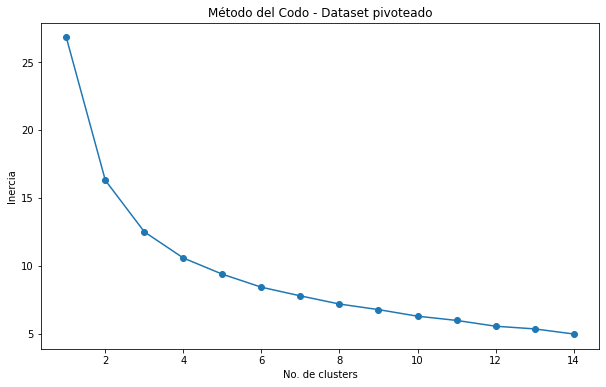

In [40]:
## Hallar el valor óptimo de K utilizando el método elbow ##
#Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = [] 
for i in range(1, 15):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)
#Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo - Dataset pivoteado')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 15)), inercia, marker='o')
plt.show()

C:\Users\mcattaneo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


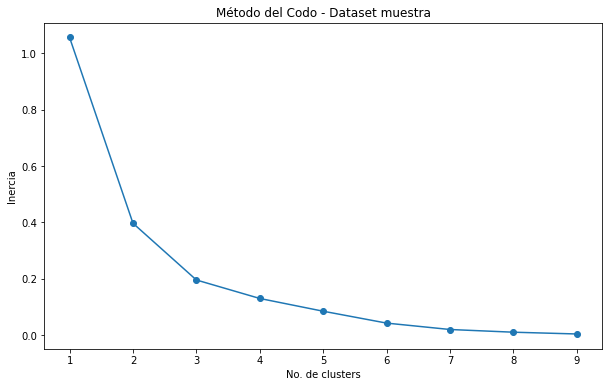

In [29]:
## Hallar el valor óptimo de K utilizando el método elbow ##
#Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = [] 
for i in range(1, 10):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X_Muestras)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)
#Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo - Dataset muestra')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 10)), inercia, marker='o')
plt.show()

En función del gráfico anterior identifique el valor de K a utilizar. Esto servirá para indicar el parámetro n_cluster. 

El parámetro “init” por defecto utiliza “k-means++”.

El parámetro “max_iter” es el número máximo de iteraciones del algoritmo K Means para una sola ejecución, por defecto es 300. Variar este parámetro e indicar si mejoran los resultados.

El último parámetro a confgiurar en esta oportunidad es “n_init el cual es el número de veces que el algoritmo se ejecutará con diferentes centroides. El valor por defecto es de 10. Variar este parámetro e indicar si mejoran los resultados.

In [41]:
k = 4
model = KMeans(n_clusters = k, init = 'k-means++', max_iter = 500, n_init = 10)
model.fit(X)
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = model.cluster_centers_, model.labels_

In [44]:
k = 5
model = KMeans(n_clusters = k, init = 'k-means++', max_iter = 500, n_init = 10)
model.fit(X)
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = model.cluster_centers_, model.labels_

In [47]:
k = 2
model = KMeans(n_clusters = k, init = 'k-means++', max_iter = 500, n_init = 10)
model.fit(X)
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = model.cluster_centers_, model.labels_

In [50]:
k = 6
model = KMeans(n_clusters = k, init = 'k-means++', max_iter = 500, n_init = 10)
model.fit(X)
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = model.cluster_centers_, model.labels_

#### Calculamos KMeans para la muestra

In [53]:
k = 4
model = KMeans(n_clusters = k, init = 'k-means++', max_iter = 500, n_init = 10)
model.fit(X_Muestras)
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = model.cluster_centers_, model.labels_

Verificamos los datos de muestras que separamos del dataset original para ver a que cluster pertenecen

In [35]:
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = model.predict(muestras_normalizado)
for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 1
Muestra 1 se encuentra en el clúster: 2
Muestra 2 se encuentra en el clúster: 0
Muestra 3 se encuentra en el clúster: 2
Muestra 4 se encuentra en el clúster: 0
Muestra 5 se encuentra en el clúster: 1
Muestra 6 se encuentra en el clúster: 1
Muestra 7 se encuentra en el clúster: 3
Muestra 8 se encuentra en el clúster: 3
Muestra 9 se encuentra en el clúster: 1


### 6- Graficamos los clusters encontrados


En este punto graficar los clusters encontrados 

Ejemplo de codigo si K fuera igual a 3:

plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'r.', label='cluster 1')

plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')

plt.show()

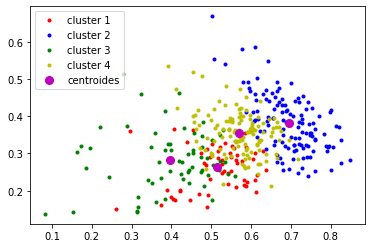

In [42]:
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'r.', label='cluster 1')

plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(X[etiquetas==3,0],X[etiquetas==3,1],'y.', label='cluster 4')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')

plt.show()

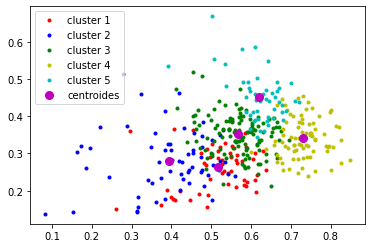

In [45]:
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'r.', label='cluster 1')

plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(X[etiquetas==3,0],X[etiquetas==3,1],'y.', label='cluster 4')

plt.plot(X[etiquetas==4,0],X[etiquetas==4,1],'c.', label='cluster 5')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')

plt.show()

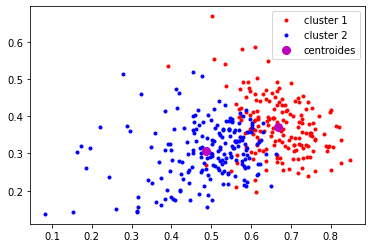

In [48]:
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'r.', label='cluster 1')

plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')

plt.show()

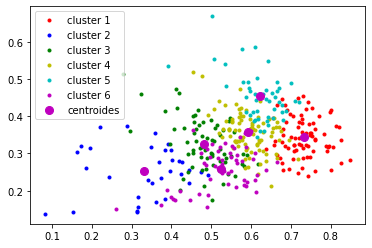

In [51]:
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'r.', label='cluster 1')

plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(X[etiquetas==3,0],X[etiquetas==3,1],'y.', label='cluster 4')

plt.plot(X[etiquetas==4,0],X[etiquetas==4,1],'c.', label='cluster 5')

plt.plot(X[etiquetas==5,0],X[etiquetas==5,1],'m.', label='cluster 6')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')

plt.show()

#### Graficamos los clusters para la muestra

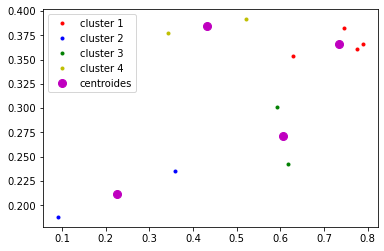

In [54]:
plt.plot(X_Muestras[etiquetas==0,0],X_Muestras[etiquetas==0,1],'r.', label='cluster 1')

plt.plot(X_Muestras[etiquetas==1,0],X_Muestras[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(X_Muestras[etiquetas==2,0],X_Muestras[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(X_Muestras[etiquetas==3,0],X_Muestras[etiquetas==3,1],'y.', label='cluster 4')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')

plt.show()

### 7- Utilizamos PCA y graficamos 

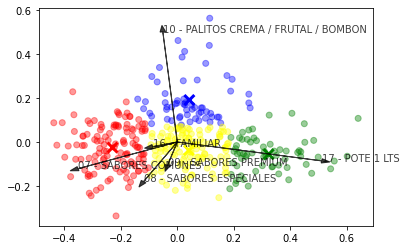

In [43]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)
# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'yellow']
#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)
#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)
#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = df_pivot.columns
#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)
plt.show()

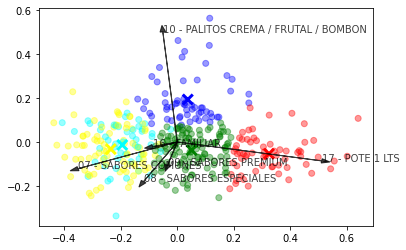

In [46]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)
# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'yellow', 'cyan']
#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)
#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)
#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = df_pivot.columns
#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)
plt.show()

In [49]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)
# Se define los colores de cada clúster
colores = ['blue', 'red']
#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)
#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)
#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = df_pivot.columns
#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)
plt.show()

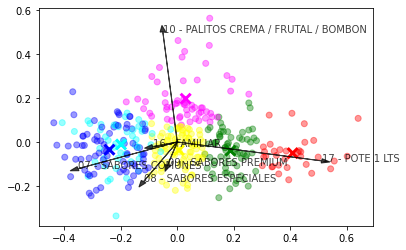

In [52]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)
# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'yellow', 'cyan', 'magenta']
#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)
#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)
#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = df_pivot.columns
#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)
plt.show()

#### Realizamos el análisis de PCA para la muestra

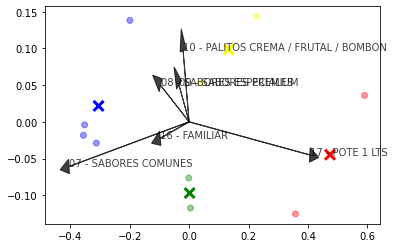

In [55]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X_Muestras)
pca = modelo_pca.transform(X_Muestras) 
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)
# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'yellow']
#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)
#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)
#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = df_pivot.columns
#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)
plt.show()

En la gráfica se pueden visualizar una serie de flechas que indican ls proyección de cada característica en el eje principal del componente. Estas flechas representan el nivel de importancia de cada característica en la escala multidimensional. Tambien se pueden observar si hay grupos bien definidos o hay puntos intercalados lo cual indicaria que son categorias que se venden en conjunto.

### 8- Conclusiones

Elaborar las conclusiones en función de los gráficos de cluster encontrados.

De las 4 pruebas que realizamos para la identificación de los clusters, consideramos que K=4 es la que mayor información nos brinda y que además los clusters están bien delimitados.
 
La distribución de los clusters se delimita de la siguiente manera:
 
1° cluster  AZUL = FAMILIAR + S.COMUNES.
 
2° cluster VERDE = S.ESPECIALES + S.PREMIUM.
 
3° cluster  AMARILLO = PALITOS CREMA / FRUTAL / BOMBON.
 
4° cluster  ROJO = POTE 1 LTS.
 
Esto significa que las categorías familiar y sabores comunes se venden en conjunto al igual que para sabores especiales y premium.
 
A mayor cantidad de K se puede observar que los clusters se empiezan a superponer, para lo cual se sugiere que dichas categorías pueden comercializarse de forma conjunta. Por ejemplo en el gráfico con K=6 se puede identificar que las categorías familiar y de sabores comunes se intercalan, y lo mismo sucede con palitos de crema/frutal/bombon y sabores premium.